# **3장. 기초 인공 신경망 모델**

## **3-2절. 과대적합 방지와 해결**

📌[실습 03-18] 라이브러리 불러오기

In [ ]:
!pip install koreanize_matplotlib  # 한글폰트 설치
import koreanize_matplotlib

import pandas as pd; import numpy as np; import matplotlib.pyplot as plt
import statsmodels.api as sm; from sklearn.metrics import r2_score; import seaborn as sns
import tensorflow as tf; from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score; import random
import warnings; warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 97.5 MB/s eta 0:00:00


📌[실습 03-19] 데이터 불러오기

In [ ]:
df=pd.read_csv("바이크_임대.csv", encoding="cp949")
df

,월,시간대,기온,습도,풍속,자외선,강우량,강설량,임대_건수
0,01월,1시,-3.2,40,0.5,0.0,0.0,0.0,90
1,01월,2시,-3.3,41,0.7,0.0,0.0,0.0,54
2,01월,3시,-3.7,42,0.9,0.0,0.0,0.0,41
3,01월,4시,-4.0,44,1.0,0.0,0.0,0.0,43
4,01월,5시,-4.2,53,1.1,0.0,0.0,0.0,73
...,...,...,...,...,...,...,...,...,...
8755,12월,20시,0.0,31,2.2,0.0,0.0,0.0,142
8756,12월,21시,-1.0,32,0.9,0.0,0.0,0.0,144
8757,12월,22시,-1.6,35,1.0,0.0,0.0,0.0,131
8758,12월,23시,-2.1,36,1.7,0.0,0.0,0.0,107


### 탐색적 데이터 분석

📌[실습 03-20] 평균 출력하기

In [ ]:
df.groupby("월")["임대_건수"].mean()

,임대_건수
월,
01월,100.205645
02월,106.016369
03월,128.518817
04월,137.093056
05월,154.803763
06월,140.391667
07월,113.715054
08월,97.965054
09월,126.505556


집단별 평균값을 시각화하기

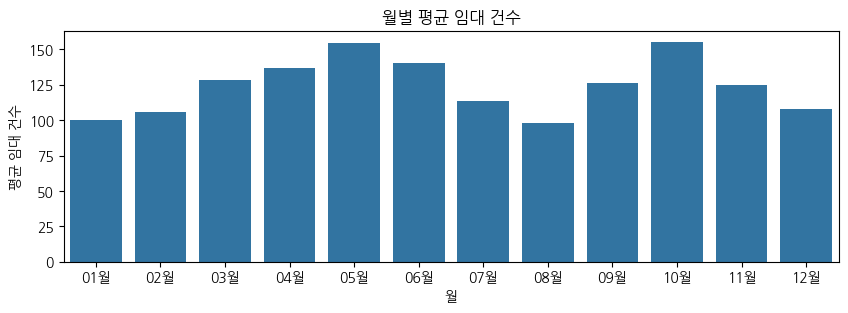

In [ ]:
q=df.groupby("월")["임대_건수"].mean()

# 가로 막대 그래프 그리기
plt.figure(figsize=(10, 3))
sns.barplot(x=q.index, y=q.values)

plt.ylabel("평균 임대 건수")
plt.xlabel("월")
plt.title("월별 평균 임대 건수")
plt.show()

📌[실습 03-22] pairplot으로 시각화하기

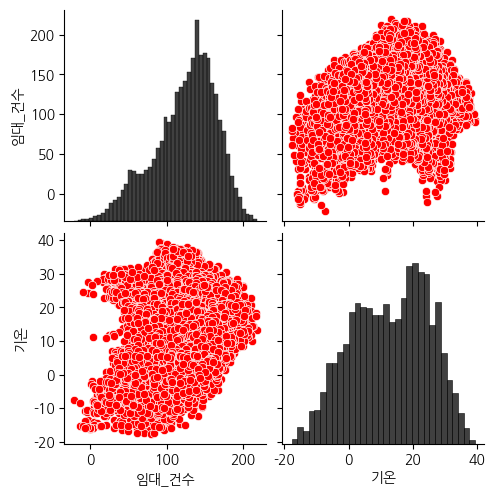

In [ ]:
sns.pairplot(df, vars=['임대_건수', '기온'],plot_kws={"color": "red"}, diag_kws={"color": "black"})
plt.show()

📌[실습 03-23] 피처와 타깃 지정하기

In [ ]:
y=df["임대_건수"]
X=df.drop(["임대_건수"], axis=1)
X.head()

,월,시간대,기온,습도,풍속,자외선,강우량,강설량
0,01월,1시,-3.2,40,0.5,0.0,0.0,0.0
1,01월,2시,-3.3,41,0.7,0.0,0.0,0.0
2,01월,3시,-3.7,42,0.9,0.0,0.0,0.0
3,01월,4시,-4.0,44,1.0,0.0,0.0,0.0
4,01월,5시,-4.2,53,1.1,0.0,0.0,0.0


자료형 확인하기

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월       8760 non-null   object 
 1   시간대     8760 non-null   object 
 2   기온      8760 non-null   float64
 3   습도      8760 non-null   int64  
 4   풍속      8760 non-null   float64
 5   자외선     8760 non-null   float64
 6   강우량     8760 non-null   float64
 7   강설량     8760 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 547.6+ KB


📌[실습 03-24] 원핫 인코딩하기

In [ ]:
X_oh=pd.get_dummies(X,drop_first=True).astype(int)  # 클래스별 더미 하나 제거
X_oh.shape

(8760, 40)

### 인공 신경망 모델 설정하기

📌[실습 03-25] 모델 설정하기

In [ ]:
# 랜덤 시드 고정
SEED=42; np.random.seed(SEED); random.seed(SEED); tf.random.set_seed(SEED)

# 훈련/검증 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(X_oh, y, test_size=0.3, random_state=SEED)

# 모델 설정
model=Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))
model.summary()
# 컴파일
model.compile(optimizer="adam", loss="mse")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,913 (7.47 KB)

 Trainable params: 1,913 (7.47 KB)

 Non-trainable params: 0 (0.00 B)

📌[실습 03-26] 분할된의 데이터 구조 확인하기

In [ ]:
print("훈련용 피처", x_train.shape)
print("검증용 피처", x_test.shape)
print("훈련용 타깃", y_train.shape)
print("검증용 타깃", y_test.shape)

훈련용 피처 (6132, 40)
검증용 피처 (2628, 40)
훈련용 타깃 (6132,)
검증용 타깃 (2628,)


### 모델 학습하기

📌[실습 03-27] 조기 종료 기능 적용해서 학습하기

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(
    monitor='val_loss',          # 검증 손실을 모니터링
    patience=5,                 # 5번 연속 개선되지 않으면 멈춤
    restore_best_weights=True )  # 가장 좋은 모델로 파라미터 복원

output=model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test), callbacks=[early_stop])

📌[실습 03-28] 손실 변화 시각화하기
- loss는 훈련데이터 손실 (최적화 기준),
- val_loss 는 검증데이터 손실 (조기 종료를 위한 모니터링),
- 너무 차이나면 오버피팅

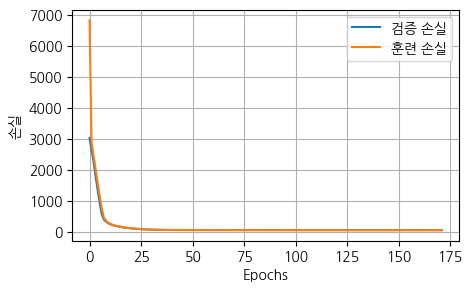

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(output.history['val_loss'], label='검증 손실')
plt.plot(output.history['loss'], label='훈련 손실')
plt.xlabel('Epochs')
plt.ylabel('손실')
plt.legend(); plt.grid()
plt.show()

### 학습된 모델의 성능 평가하기

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


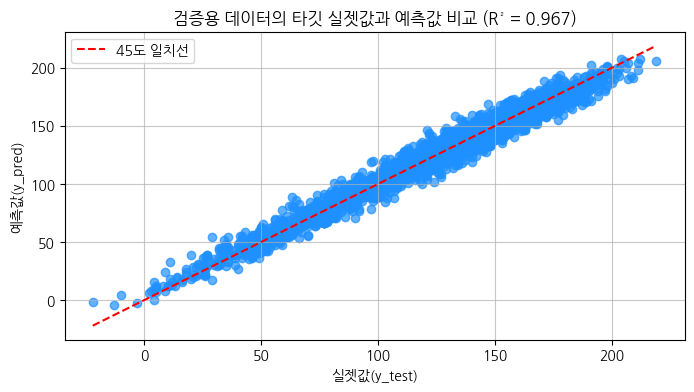

In [ ]:
# R 제곱 계산
from sklearn.metrics import mean_squared_error, r2_score
y_pred=model.predict(x_test)
r2=r2_score(y_test, y_pred)

# 예측값과 실제값 비교
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.7)  # alpha는 투명도 설정 (0~1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='45도 일치선')
plt.title(f'검증용 데이터의 타깃 실젯값과 예측값 비교 (R² = {r2:.3f})')
plt.xlabel('실젯값(y_test)')
plt.ylabel('예측값(y_pred)')
plt.legend(); plt.grid(alpha=0.7); plt.show()